In [85]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
df = pd.read_csv('../../data/iowa_train.csv')

In [86]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [87]:
gbm = GradientBoostingRegressor()
tree = GradientBoostingRegressor(max_depth=4)

In [88]:
prediction = y.mean()

In [89]:
tree.fit(X,y)

GradientBoostingRegressor(max_depth=4)

In [90]:
prediction +- tree.predict(X)

array([-15466.72957835,   3799.46207098, -30049.01270955, ...,
       -71024.45725991,  49441.25338804,  35514.84257711])

In [91]:
gradient = y - prediction

In [92]:
tree.fit(X, gradient)

GradientBoostingRegressor(max_depth=4)

In [93]:
tree.predict(X)

array([ 15466.72957835,  -3799.46207098,  30049.01270955, ...,
        71024.45725991, -49441.25338804, -35514.84257711])

In [94]:
gbm

GradientBoostingRegressor()

### Gradient Boosting & Scikit-Learn Intro

This lab is designed to give everyone their first introduction to the Scikit-Learn API, and Gradient Boosting, one of the most powerful techniques in predictive modeling.

During this lab you'll see if you can build a model, understand its working parts, and make improvements to your results!  

The great thing about `Scikit Learn` is that its API is almost identical from one algorithm to another, so once you get the hang of how to use it, using different methods is fairly seamless.

**Step 1:** Load in the `iowa_housing.csv` file

In [95]:
df = pd.read_csv('../../data/iowa_train.csv')

**Step 3:** Declare your `X` & `y` variables -- We'll be predicting price.

In [96]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

**Step 4:** Import `GradientBoostingRegressor` and initialize it.

In [97]:
gbm = GradientBoostingRegressor()

**Step 5:** Call the `fit()` method on `X` & `y`

In [98]:
gbm.fit(X, y)

GradientBoostingRegressor()

**Step 6:** Make a column that represents the predictions your model made for each sample

In [99]:
df['Predictions'] = gbm.predict(X)

**Step 7:** Check the score of your model using the `score()` method

In [100]:
gbm.score(X, y)

0.9371367715410339

In [101]:
naive_prediction = y.mean()

In [102]:
naive_model_cost = np.sum((y-naive_prediction)**2)

In [103]:
model_cost =np.sum((y- gbm.predict(X))**2)

In [104]:
1- (model_cost/naive_model_cost)

0.9371367715410339

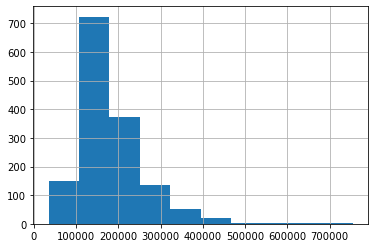

In [105]:
y.hist()

**Step 8:** Take a look at the values returned from the `feature_importances_` attribute

In [116]:
gbm.feature_importances_

array([0.00080804, 0.00293374, 0.02789595, 0.56745495, 0.01226212,
       0.04798342, 0.06909902, 0.08166564, 0.036332  , 0.07857384,
       0.00866232, 0.00183076, 0.06449822])

**Step 9:** To make a bit more sense out of these, let's put these values into a more readable format.  

Try making a 2 column dataframe using `X.columns` and the values from `feature_importances_` (they should correspond to one another).

In [120]:
feats = pd.DataFrame({
    'Column': X.columns,
    'Importance': gbm.feature_importances_
})

query = feats.set_index('Column').sort_values(by='Importance', ascending=False)['Importance']>.01

In [127]:
gbm.fit(X.loc[:,query],y).score(X.loc[:,query],y)

0.9377636242979969

**Step 10:** Can you improve your results?  For now, toy around a little bit with a few different options for getting different results.  These could be any of the following:

 - changing the number of boosting rounds used via `n_estimators`
 - changing the learning rate
 - removing columns that have lower feature importance, or very low correlation with the target variable
 - combining columns to make them more complete -- total number of bathrooms, total square footage, etc
 
**hint:** You can use the `set_params()` method to change model parameters.

In [83]:
query = feats.Importance > .01
cols_to_use = feats.loc[query, 'Columns'].tolist()

print(f"New model score is: {gbm.fit(X[cols_to_use], y).score(X[cols_to_use], y)}")

New model score is: 0.9377636242979969


In [128]:
rates = [.001, .01, .1]
num_trees = [100, 500, 1000]
mod_scores = []

for rate in rates:
    for tree in num_trees:
        gbm.set_params(learning_rate=rate, n_estimators=tree)
        mod_score = gbm.fit(X, y).score(X, y)
        mod_scores.append((mod_score, rate, tree))

In [130]:
mod_scores

[(0.13505308370657765, 0.001, 100),
 (0.48386589516141687, 0.001, 500),
 (0.6924023520329464, 0.001, 1000),
 (0.6931711968390902, 0.01, 100),
 (0.9233806654488266, 0.01, 500),
 (0.9380090407562518, 0.01, 1000),
 (0.9371367715410339, 0.1, 100),
 (0.9819054167768367, 0.1, 500),
 (0.9932375395871119, 0.1, 1000)]

In [ ]:
print(max(mod_scores))

In [21]:
naive_prediction = y.mean()

In [22]:
naive_model_cost= np.sum((y-naive_prediction)**2)

In [23]:
model_cost = np.sum(y- gbm.predict(X))

In [132]:
df = pd.read_csv('../../data/iowa_train2.csv')

In [133]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,GrLivArea,1stFlrSF,2ndFlrSF,GrLivArea.1,FullBath,HalfBath,GarageType,GarageYrBlt,GarageFinish,GarageCars,SalePrice
0,1,60,RL,8450,CollgCr,7,5,2003,1710,856,854,1710,2,1,Attchd,2003.0,RFn,2,208500
1,2,20,RL,9600,Veenker,6,8,1976,1262,1262,0,1262,2,0,Attchd,1976.0,RFn,2,181500
2,3,60,RL,11250,CollgCr,7,5,2001,1786,920,866,1786,2,1,Attchd,2001.0,RFn,2,223500
3,4,70,RL,9550,Crawfor,7,5,1915,1717,961,756,1717,1,0,Detchd,1998.0,Unf,3,140000
4,5,60,RL,14260,NoRidge,8,5,2000,2198,1145,1053,2198,2,1,Attchd,2000.0,RFn,3,250000


In [136]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Neighborhood     0
OverallQual      0
OverallCond      0
YearBuilt        0
GrLivArea        0
1stFlrSF         0
2ndFlrSF         0
GrLivArea.1      0
FullBath         0
HalfBath         0
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageCars       0
SalePrice        0
dtype: int64

In [137]:
def denote_null_values(df):
    empty_cols_query = df.isnull().sum() > 0
    empty_df_cols = df.loc[:, empty_cols_query].columns.tolist()
    for col in empty_df_cols:
        col_name = f"{col}_missing"
        df[col_name] = pd.isnull(df[col])
    return df

In [138]:
denote_null_values(df)

,Id,MSSubClass,MSZoning,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,GrLivArea,1stFlrSF,...,FullBath,HalfBath,GarageType,GarageYrBlt,GarageFinish,GarageCars,SalePrice,GarageType_missing,GarageYrBlt_missing,GarageFinish_missing
0,1,60,RL,8450,CollgCr,7,5,2003,1710,856,...,2,1,Attchd,2003.0,RFn,2,208500,False,False,False
1,2,20,RL,9600,Veenker,6,8,1976,1262,1262,...,2,0,Attchd,1976.0,RFn,2,181500,False,False,False
2,3,60,RL,11250,CollgCr,7,5,2001,1786,920,...,2,1,Attchd,2001.0,RFn,2,223500,False,False,False
3,4,70,RL,9550,Crawfor,7,5,1915,1717,961,...,1,0,Detchd,1998.0,Unf,3,140000,False,False,False
4,5,60,RL,14260,NoRidge,8,5,2000,2198,1145,...,2,1,Attchd,2000.0,RFn,3,250000,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Gilbert,6,5,1999,1647,953,...,2,1,Attchd,1999.0,RFn,2,175000,False,False,False
1456,1457,20,RL,13175,NWAmes,6,6,1978,2073,2073,...,2,0,Attchd,1978.0,Unf,2,210000,False,False,False
1457,1458,70,RL,9042,Crawfor,7,9,1941,2340,1188,...,2,0,Attchd,1941.0,RFn,1,266500,False,False,False
1458,1459,20,RL,9717,NAmes,5,6,1950,1078,1078,...,1,0,Attchd,1950.0,Unf,1,142125,False,False,False
